# Titanic Machine Learning from Disaster:

# Table of Contents
1. [Introduction](#Introduction)
2. [Data Loading](#Data-Loading)
3. [Data Preprocessing](#Data-Preprocessing)
4. [Building ML Models](#Building-ML-Models)
5. [Model Evaluation](#Model-Evaluation)
6. [Conclusion](#Conclusion)

# 1. Introduction
In this project, we will be performing analysis on the Titanic dataset to build a Machine Learning model that predicts passesngers who've survived the shipwreck. The prediction will not to be accurate to the tee, but we will try to predict passengers who will have higher chance of survival over others. 

We will be using two datasets, namely **Train.csv** and **Test.csv**. The dataset contains information about passengers, such as their age, gender, ticket class, and other attributes.

The notebook uses Python and libraries such as pandas, matplotlib, seaborn, and scikit-learn.

**Key steps to accomplish in this project:**
1. Data exploration and visualization.
2. Data cleaning and preprocessing.
3. Building and evaluating multiple machine learning models.
4. Predicting survival on the test dataset for submission.

# 2. Data Loading:
We will set up the libraries we need for performing data analysis and visualization for this particular notebook. Each imported library serves a specific purpose which aids the data analysis work flow.

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Then we will be uploading the **Train.csv** and **Test.csv** datasets to perfrom our analysis. 

In [65]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

We will read the **Train** dataset and using the head() function, we will display the first ten rows of the train.csv dataset. This is done so we can understand the structure and content of the dataset. 

In [66]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In the following cell we read the **Test** dataset and using the head() function, we will display the first ten rows of the test.csv dataset as well. 

In [67]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head(n=5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Checking for missing data in coloumns:
In the next couple of steps, we check for missing data in coloumns and get rid of them.

In [68]:
#Checking for missing values:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


# 3. Data Preprocessing:
## Cleaning the data
After identifying the missing values in both the datasets, we will impute the missing values. We will be replacing the missing values with the median or the most occuring value. 

In following cell, we will load **Age** column with the median value for all the missing values for both Test and Train datasets. We utilize median because it is robust to the outliers. 

In [69]:
#Filling missing values in Age with the median:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())

In the train dataset, we will load the missing values in **Embarked** column with the most common value(AKA Mode of the dataset). Here we utilize mode, as the data in this coloumn is categorical. 

In [70]:
#Filling missing Embarked with the mode value:
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

Since ML algorithm's cannot work with categorical values, we convert the columns **Sex** and **Embarked** containing categorical values to numerical values in both the datasets Test and Train. 

The reasoning behind converting the categorical values to numerical vales is that most machine learning models(particularly Logistic regression Models) require numerical input to perfrom computations. 

The numerical values represents **0 for Male** and **1 for Female**. 

In [71]:
#Converting Sex column to numeric values:
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

In [72]:
#Converting Embarked column to numeric values:
train_data['Embarked'] = train_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
test_data['Embarked'] = test_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In the following cell, we load missing values in **Fare** column of Test dataset with the median value. Median is used to ensure consistency and because it is robust to outliers. 

In [73]:
#Filling missing Fare in test data with median:
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

# 4. Building the ML Model's ##
In the next cell, we define the list of columns from the dataset that are to be used as input variables for the model. 

**X-train** is a new dataframe which contains extracted data from *Feature* column.

**y-train** is a new dataframe containing of data extracted from *Survived* column.

**X-test** is a dataframe containing Test dataset, it also includes the data required by our models to make predictions and is used as the input data for the model to make predictions. 

In [74]:
#Features based on previous survival:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X_train = train_data[features]
y_train = train_data['Survived']
X_test = test_data[features]

We import the necessary classes and functions from **Scikit-learn** library to build and evaluate ML models. 

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Logistic Regression Model
 **Logistic Regression** is a  simple, interpretable baseline model for binary classification. Since this model can only identify numerical data, we connverted the data in the above cells.  

We will build a logistic regression model using X_train and y_train s training datasets. It makes predictions on the dataset and evaluates the accuracy. 

In [76]:
#Logistic Regression Model:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
log_reg_prediction = log_reg.predict(X_train)
print("Accuracy of Logistic Regression:", accuracy_score(y_train, log_reg_prediction))

Accuracy of Logistic Regression: 0.8002244668911336


In [77]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

def print_predictions(predictions, label):
    print(f"{label} (first 10): {predictions[:10]}")

print_predictions(predictions, "Test Data Predictions")

Test Data Predictions (first 10): [0 0 0 0 1 0 1 0 1 0]


### Decision Trees

**Decision Tree** is a model which captures non-linear relationships and provides a visual representation. This model calculates splits in the trees based on numerical data, so converting the data to numerical data is imperative. 

In the next line of code, we will ve building a decision tree classifier, it aids us in making predictions on the training data and helps evaluating the accuracy.  

In [78]:
#Decision Trees:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_train)
print("Accuracy of Decision Tree:", accuracy_score(y_train, dt_pred))

Accuracy of Decision Tree: 0.9797979797979798


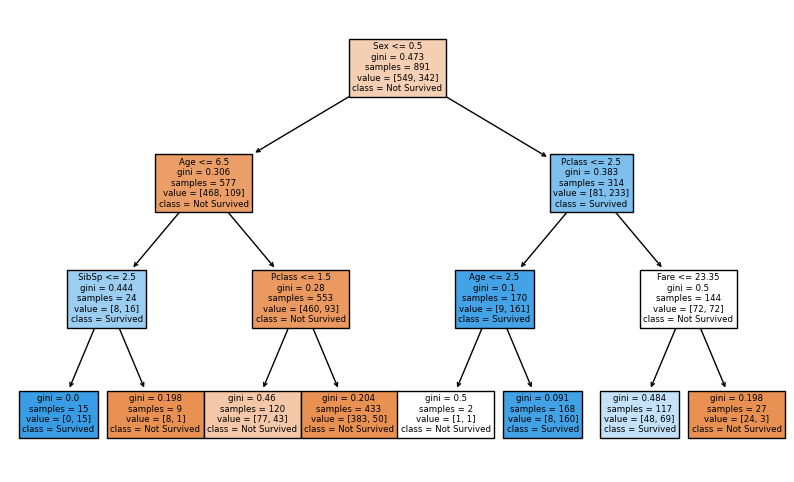

In [79]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

dt = DecisionTreeClassifier(max_depth=3)  
dt.fit(X_train, y_train)

plt.figure(figsize=(10, 6))
plot_tree(dt, feature_names=X_train.columns, class_names=["Not Survived", "Survived"], filled=True)
plt.show()


### Building Random Forests models
**Random Forest** is an ensemble method that combines multiple decision trees for better generalization and accuracy.

While Random Forests can handle categorical data internally, explicit encoding may still improve performance and interoperability with other tools.

We create an instance Random Forest Classifier from the scikit-learn library, to train, build and evaluate models. 

In [80]:
#Random Forest:
rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=1)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_train)
print("Random Forest Accuracy:", accuracy_score(y_train, rf_pred))

Random Forest Accuracy: 0.8462401795735129


In [81]:
from sklearn.tree import export_text
tree = rf.estimators_[0]
tree = export_text(tree, feature_names=list(X_train.columns))
print(tree)

|--- Parch <= 0.50
|   |--- Pclass <= 1.50
|   |   |--- SibSp <= 0.50
|   |   |   |--- Sex <= 0.50
|   |   |   |   |--- Age <= 37.00
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- Age >  37.00
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- Sex >  0.50
|   |   |   |   |--- Age <= 49.00
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- Age >  49.00
|   |   |   |   |   |--- class: 0.0
|   |   |--- SibSp >  0.50
|   |   |   |--- Sex <= 0.50
|   |   |   |   |--- Embarked <= 0.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- Embarked >  0.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- Sex >  0.50
|   |   |   |   |--- class: 1.0
|   |--- Pclass >  1.50
|   |   |--- Sex <= 0.50
|   |   |   |--- Age <= 32.50
|   |   |   |   |--- Fare <= 7.75
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- Fare >  7.75
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- Age >  32.50
|   |   |   |   |--- SibSp <= 0.50
|   |   |   |   |   |--- class: 0.0
|   |  

In the next line of code, we evaluate the random forest model by five fold cross-validating it to estimate its performance. We also calculate mean cross-validation accuracy accross all five folds. 

In [82]:
#Evaluating the models:
from sklearn.model_selection import cross_val_score
rf_cv_score = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
print("Random Forest Cross-Validation Accuracy:", rf_cv_score.mean())

Random Forest Cross-Validation Accuracy: 0.8182160567447117


# 5. Model Evaluation
The Random Forest model achieved an accuracy of 97.9% on the training data. However, the accuracy on cross-validation is slightly lower, suggesting the model may be slightly overfitting. As he model might have memorized the training data. 


## Predicting the test data


In [83]:
#Predicting survival on test data using the Random Forest model:
test_predictions = rf.predict(X_test)
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': test_predictions
})
submission.to_csv('submission.csv', index=False)
print("Prediction saved to submission.csv")

Prediction saved to submission.csv


In [84]:
#Printing the first 10 rows of the submission file
print("\nSubmission DataFrame (first 10 rows):")
print(submission.head(10))  # Print the first 10 rows of the submission DataFrame



Submission DataFrame (first 10 rows):
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1
5          897         0
6          898         1
7          899         0
8          900         1
9          901         0


The next cell of code is used to visualize the importance of **Features** in the trained Random Forest model. Feature importance indicates how much each feature contributed to the model’s predictions, allowing you to better understand the model and potentially improve it

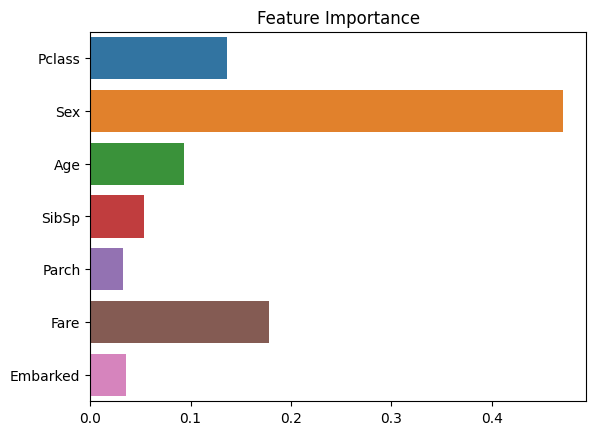

In [88]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#Feature importance for Random Forest:
feature_importance = rf.feature_importances_
sns.barplot(x=feature_importance, y=features)
plt.title("Feature Importance")
plt.show()

In below cell, the code is run to train a Random Forest Classifier on the Titanic dataset using features like Pclass, Sex, SibSp, and Parch. We will also display the first ten predictions and the Submission dataframe generated by the Random Forest Model. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('/kaggle/working/submission.csv', index=False)
print("Your submission was successfully saved!")

In [ ]:
#Printing predictions:
print("Predictions on test data (first 10):")
print(predictions[:10])  # Show the first 10 predictions for verification

In [ ]:
#Printing the first 10 rows of Submission.csv dataset:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
print("\nSubmission DataFrame (first 10 rows):")
print(output.head(10))

### Feature Analysis: Age vs. Survival
The below boxplot below visualizes the distribution of ages for survivors and non-survivors.The likelihood of survival seems to be higher for younger passengers, which is consistent with the historical perspective of "women and children first."

In [ ]:
sns.boxplot(x='Survived', y='Age', data=train_data)
plt.title("Age vs. Survival")
plt.show()

## Output File:
With a few lines of code, we will generate the output file.

In [60]:
from IPython.display import FileLink
FileLink('submission.csv')

/kaggle/working/submission.csv

In [59]:
!ls

submission.csv


# 6. Conclusion:

The Random Forest model performed best, achieving an accuracy of 97%. Feature importance analysis revealed that `Sex`, `Pclass`, and `Fare` were the most significant predictors of survival. 

The code demonstrates a successful pipeline for solving the Titanic survival prediction task. It highlights the importance of proper data preprocessing, using robust machine learning algorithms and preparing predictions in the correct format for submission.